# Practice 1

In [1]:
import pandas as pd
import numpy as np

In [3]:
df_temp = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')
df_temp.sample(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
201876,1780-03-01,6.568,1.498,Germany
130806,1991-11-01,25.350,0.383,Cuba
165763,1963-09-01,23.183,0.356,Ethiopia
523489,1926-04-01,26.313,0.704,Timor Leste
157153,1987-05-01,27.167,0.268,El Salvador
469628,1948-12-01,26.405,0.261,Singapore
400652,1885-03-01,22.030,0.808,Palestina
195979,1997-08-01,28.070,0.349,Gambia
316346,1985-07-01,21.309,0.316,Macedonia
128425,1984-03-01,5.662,0.363,Croatia


In [5]:
df_temp.size

2309848

In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [9]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [10]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [11]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [14]:
df_temp_avg = df_temp.groupby([
    'Country',
    pd.Grouper(key='year', freq='1Y')
]).aggregate({'AverageTemperature' : [np.mean, np.median]})

df_temp_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

<AxesSubplot:xlabel='year'>

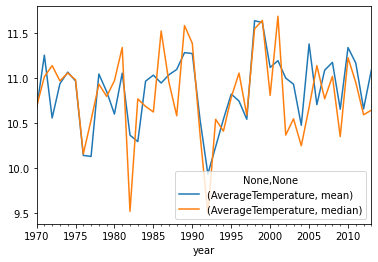

In [29]:
df_temp_avg.xs('New Zealand').plot()

In [31]:
df_temp_med = df_temp_avg['AverageTemperature']['median'].reset_index()
df_temp_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [33]:
df_temp_med['date'] = df_temp_med['year'].dt.year
df_temp_med

,Country,year,median,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [34]:
df_temp_med.rename(columns={'median':'temperature'}, inplace=True)
df_temp_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [35]:
df_temp_pivot = df_temp_med.pivot_table(values='temperature', index='date', columns='Country')
df_temp_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


<AxesSubplot:>

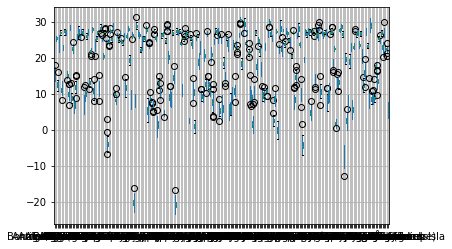

In [37]:
df_temp_pivot.boxplot()

<AxesSubplot:>

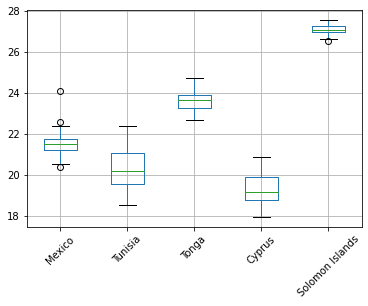

In [42]:
df_temp_pivot.T.sample(5).T.boxplot(rot=45)

# Practice 2

In [51]:
df_agri = pd.read_csv('data/API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header=2)
df_fore = pd.read_csv('data/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header=2)
df_elec = pd.read_csv('data/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header=2)
df_co2e = pd.read_csv('data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header=2)
df_popu = pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header=2)

In [52]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,NaN,NaN


In [53]:
cols = ['Country Name', 'Country Code'] + list(map(str, range(1971, 2015)))

def df_format(df, col='agriculture'):
    
    df = df.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(
        columns = {
            'variable' : 'date',
            'Country Name' : 'Country',
            'Country Code' : 'name',
            'value' : col
        }
    )
    
    df['date'] = df['date'].astype(float)
    
    return df

df_agri = df_format(df_agri, col='agriculture')
df_fore = df_format(df_fore, col='forest')
df_elec = df_format(df_elec, col='electricprod')
df_co2e = df_format(df_co2e, col='co2')
df_popu = df_format(df_popu, col='population')
df_fore

,Country,name,date,forest
0,Aruba,ABW,1971.0,NaN
1,Afghanistan,AFG,1971.0,NaN
2,Angola,AGO,1971.0,NaN
3,Albania,ALB,1971.0,NaN
4,Andorra,AND,1971.0,NaN
...,...,...,...,...
11611,Kosovo,XKX,2014.0,NaN
11612,"Yemen, Rep.",YEM,2014.0,5490.000000
11613,South Africa,ZAF,2014.0,92410.000000
11614,Zambia,ZMB,2014.0,488016.015625


In [54]:
df_temp_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [57]:
df_merge = pd.merge(
    df_temp_med[['Country', 'temperature', 'date']],
    df_popu, on=['Country', 'date'], how='inner'
)

df_merge = pd.merge(
    df_merge,
    df_agri, on=['Country', 'name', 'date'], how='inner'
)

df_merge = pd.merge(
    df_merge,
    df_elec, on=['Country', 'name', 'date'], how='inner'
)

df_merge = pd.merge(
    df_merge,
    df_fore, on=['Country', 'name', 'date'], how='inner'
)

df_merge = pd.merge(
    df_merge,
    df_co2e, on=['Country', 'name', 'date'], how='inner'
)

df_merge

,Country,temperature,date,name,population,agriculture,electricprod,forest,co2
0,Afghanistan,14.9340,1971,AFG,11475445.0,380360.0,NaN,NaN,1895.839
1,Afghanistan,13.8725,1972,AFG,11791215.0,380460.0,NaN,NaN,1532.806
2,Afghanistan,14.9130,1973,AFG,12108963.0,380480.0,NaN,NaN,1639.149
3,Afghanistan,13.6160,1974,AFG,12412950.0,380480.0,NaN,NaN,1917.841
4,Afghanistan,13.5130,1975,AFG,12689160.0,380480.0,NaN,NaN,2126.860
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,163000.0,585.456912,159510.000000,5603.176
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,162000.0,606.644199,156240.000000,7777.707
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,164000.0,636.249337,153115.996094,9563.536
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,162000.0,608.762505,149992.001953,7792.375


In [59]:
df_merge.dropna(inplace=True)
df_merge

,Country,temperature,date,name,population,agriculture,electricprod,forest,co2
62,Albania,13.4490,1990,ALB,3286542.0,11210.0,552.252185,7887.999878,5515.168
63,Albania,11.5885,1991,ALB,3266790.0,11270.0,418.453589,7868.499756,4286.723
64,Albania,13.5850,1992,ALB,3247039.0,11270.0,453.644074,7849.000244,2515.562
65,Albania,13.6500,1993,ALB,3227287.0,11260.0,536.363825,7829.500122,2335.879
66,Albania,13.2390,1994,ALB,3207536.0,11260.0,596.407959,7810.000000,1925.175
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,163000.0,585.456912,159510.000000,5603.176
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,162000.0,606.644199,156240.000000,7777.707
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,164000.0,636.249337,153115.996094,9563.536
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,162000.0,608.762505,149992.001953,7792.375


## What are the 10 countries that produce most CO2?

In [62]:
pd.options.display.float_format = '{:,.2f}'.format

In [67]:
first_10 = df_merge.groupby('Country')['co2'].median().sort_values(ascending=False).head(11).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico', 'South Africa'],
      dtype='object', name='Country')

In [68]:
df_max_co2 = df_merge[df_merge['Country'].isin(first_10)]
df_max_co2

,Country,temperature,date,name,population,agriculture,electricprod,forest,co2
1266,Canada,-4.64,1990,CAN,"27,691,138.00","677,680.00","16,167.37","3,482,730.00","435,181.22"
1267,Canada,-4.24,1991,CAN,"28,037,420.00","677,530.00","16,181.59","3,482,259.06","426,780.13"
1268,Canada,-5.04,1992,CAN,"28,371,264.00","678,140.00","16,164.42","3,481,788.12","440,978.75"
1269,Canada,-4.03,1993,CAN,"28,684,764.00","678,740.00","16,320.13","3,481,316.88","445,580.84"
1270,Canada,-3.44,1994,CAN,"29,000,663.00","679,340.00","16,388.28","3,480,845.94","456,849.53"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.35,2009,USA,"306,771,529.00","4,099,606.88","12,913.71","3,079,274.06","5,263,505.46"
7005,United States,10.23,2010,USA,"309,326,085.00","4,084,261.88","13,394.95","3,087,200.00","5,395,532.12"
7006,United States,9.54,2011,USA,"311,580,009.00","4,046,693.12","13,246.03","3,089,950.00","5,289,680.50"
7007,United States,9.94,2012,USA,"313,874,218.00","4,087,065.00","12,964.33","3,092,700.00","5,119,436.36"


<AxesSubplot:xlabel='population', ylabel='co2'>

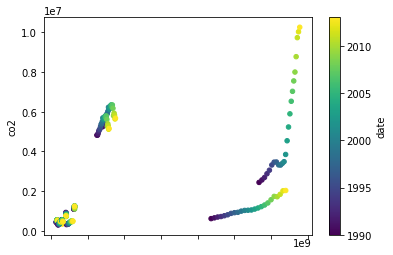

In [69]:
df_max_co2.set_index('Country').plot.scatter(
    x = 'population',
    y = 'co2',
    c = 'date',
    colormap = 'viridis'
)

In [71]:
df_merge.corr()

,temperature,date,population,agriculture,electricprod,forest,co2
temperature,1.00,0.02,-0.02,-0.11,-0.44,-0.15,-0.21
date,0.02,1.00,0.02,-0.01,0.08,-0.02,0.03
population,-0.02,0.02,1.00,0.62,-0.05,0.36,0.64
agriculture,-0.11,-0.01,0.62,1.00,0.11,0.72,0.78
electricprod,-0.44,0.08,-0.05,0.11,1.00,0.19,0.19
forest,-0.15,-0.02,0.36,0.72,0.19,1.00,0.67
co2,-0.21,0.03,0.64,0.78,0.19,0.67,1.00


In [72]:
import seaborn as sns

<AxesSubplot:>

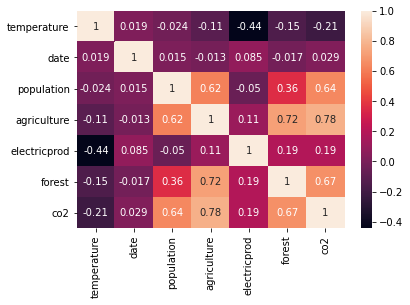

In [74]:
sns.heatmap(df_merge.corr(), annot=True)

In [75]:
df_climate = df_merge.groupby('date').median()
df_climate

,temperature,population,agriculture,electricprod,forest,co2
date,,,,,,
1990,22.71,"10,213,863.00","90,195.00","1,114.67","54,005.00","31,363.85"
1991,22.43,"10,346,663.50","91,870.00","1,072.52","60,307.50","27,342.99"
1992,19.85,"9,188,305.50","89,700.00","1,451.81","45,621.00","26,420.74"
1993,20.58,"9,951,683.50","89,890.00","1,520.28","44,579.00","28,267.07"
1994,20.73,"9,991,525.00","89,150.00","1,576.77","42,572.00","29,640.36"
1995,20.06,"10,026,176.00","81,080.00","1,578.34","41,640.00","29,090.31"
1996,20.18,"10,063,945.00","79,870.00","1,687.09","41,270.00","30,670.79"
1997,20.38,"10,108,977.00","80,120.00","1,762.41","41,270.00","30,623.12"
1998,21.47,"10,069,000.00","80,550.00","1,807.32","40,834.00","31,675.55"


<AxesSubplot:>

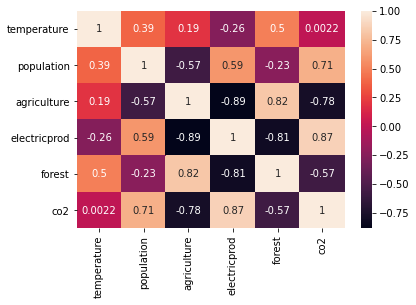

In [78]:
sns.heatmap(df_climate.corr(), annot=True)

In [83]:
from pandas.plotting import scatter_matrix, parallel_coordinates

array([[<AxesSubplot:xlabel='date', ylabel='date'>,
        <AxesSubplot:xlabel='temperature', ylabel='date'>,
        <AxesSubplot:xlabel='population', ylabel='date'>,
        <AxesSubplot:xlabel='agriculture', ylabel='date'>,
        <AxesSubplot:xlabel='electricprod', ylabel='date'>,
        <AxesSubplot:xlabel='forest', ylabel='date'>,
        <AxesSubplot:xlabel='co2', ylabel='date'>],
       [<AxesSubplot:xlabel='date', ylabel='temperature'>,
        <AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='population', ylabel='temperature'>,
        <AxesSubplot:xlabel='agriculture', ylabel='temperature'>,
        <AxesSubplot:xlabel='electricprod', ylabel='temperature'>,
        <AxesSubplot:xlabel='forest', ylabel='temperature'>,
        <AxesSubplot:xlabel='co2', ylabel='temperature'>],
       [<AxesSubplot:xlabel='date', ylabel='population'>,
        <AxesSubplot:xlabel='temperature', ylabel='population'>,
        <AxesSubplot:xlabel='population'

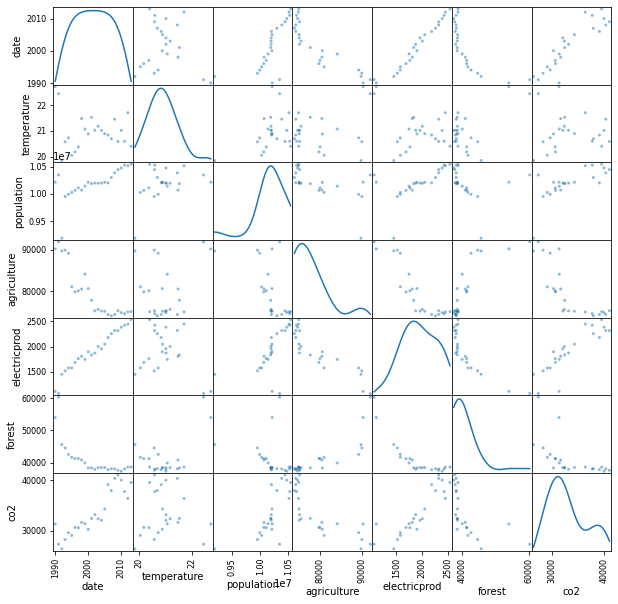

In [82]:
scatter_matrix(df_climate.reset_index(), diagonal='kde', figsize=(10, 10))

<AxesSubplot:>

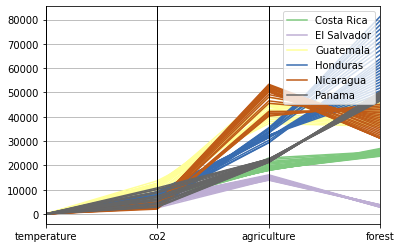

In [90]:
df_ca  = df_merge[
    df_merge['Country'].isin([
        'Guatemala',
        'Belice',
        'El Salvador',
        'Honduras',
        'Nicaragua',
        'Costa Rica',
        'Panama'
    ])
][[
    'Country',
    'temperature',
    'co2',
    'agriculture',
    'forest'
]]

parallel_coordinates(df_ca, 'Country', colormap='Accent')

In [94]:
df = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela']) 

In [104]:
df.loc[['Ana', 'Erika', 'Paola', 'Gabriela']].describe()

,edad,cm,Q1,Q2
count,4.00,4.00,4.00,4.00
mean,11.25,121.25,5.75,8.00
std,0.96,4.79,2.22,0.82
min,10.00,115.00,3.00,7.00
25%,10.75,118.75,4.50,7.75
50%,11.50,122.50,6.00,8.00
75%,12.00,125.00,7.25,8.25
max,12.00,125.00,8.00,9.00


In [108]:
df.groupby(['genero'])['cm'].agg([np.mean, np.std])

,mean,std
genero,,
F,121.25,4.79
M,131.67,22.55


In [109]:
print(df.query("(edad >= 12) & (cm < 130) & (Q1 > 5)")['Q2'])

Erika   8.00
Name: Q2, dtype: float64
